In [7]:
import nltk
import pickle
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import re
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [2]:
def tag_lemma(text):
    tokens = word_tokenize(text.lower())
    lmtzr = WordNetLemmatizer()
    p=[]
    for token, tag in pos_tag(tokens):
        lemma = str(lmtzr.lemmatize(token, tag_map[tag[0]]))
        p.append(lemma) 
        words= [w for w in p if not w in stop_words]
    return ' '.join(words)

In [5]:
def slang_percent(string):
    c=0
    text_file = string 
    a=['jin','rum','whiskey','tequila','brandy','vermouth','moonshine','ale','cider','lager','soju','emperador','bacardi','smirnoff','johnnie walker','scotch','bagpiper','royal stag','absolut','jack daniel','imperial blue','hennessy','chivas regal','blenders pride','seagram','hooch','moonshine','vino','draft','suds','street','drug','vino','cordial','liqueur','neutral','spirits','alcoholic','drink','kumis','booze','drinkable','hootch','potable','mixed','drink','kavakava','rice','beer','perry','saki','sake','brewage','nipa','slug','inebriant','strong','drink','liquor','drink','intoxicant','drink','homebrew','koumiss','cider','spirits','rotgut','kava','ethyl','alcohol','home','brew','beverage','pulque','brew','hooch','aperitif','spirit','wine']
    s=["a55","a55hole","aeolus","ahole","anal","analprobe","anilingus","anus","areola","areole","arian","aryan","ass","assbang","assbanged","assbangs","asses","assfuck","assfucker","assh0le","asshat","assho1e","asshole","assholes","assmaster","assmunch","asswipe","asswipes","azazel","azz","b1tch","ballsack","bang","banger","barf","bastard","bastards","bawdy","beaner","beardedclam","beastiality","beatch","beater","beaver","beer","beeyotch","beotch","biatch","bigtits","bigtits","bimbo","bitch","bitched","bitches","bitchy","blowjob","blow","blowjob","blowjobs","bod","bodily","boink","bollock","bollocks","bollok","bone","boned","boner","boners","bong","boob","boobies","boobs","booby","booger","bookie","bootee","bootie","booty","booze","boozer","boozy","bosom","bosomy","bowel","bowels","bra","brassiere","breast","breasts","bugger","bukkake","bullshit","bullshit","bullshits","bullshitted","bullturds","bung","busty","butt","buttfuck","buttfuck","buttfucker","buttfucker","buttplug","c0ck","cock","cunt","c0ck","c0ck","caca","cahone","cameltoe","carpetmuncher","cawk","cervix","chinc","chincs","chink","chink","chode","chodes","cl1t","climax","clit","clitoris","clitorus","clits","clitty","cocain","cocaine","cock","cock","cockblock","cockholster","cockknocker","cocks","cocksmoker","cocksucker","cocksucker","coital","commie","condom","coon","coons","corksucker","crabs","crack","cracker","crackwhore","crap","crappy","cum","cummin","cumming","cumshot","cumshots","cumslut","cumstain","cunilingus","cunnilingus","cunny","cunt","cunt","cunt","cuntface","cunthunter","cuntlick","cuntlicker","cunts","d0ng","d0uch3","d0uche","d1ck","d1ld0","d1ldo","dago","dagos","dammit","damn","damned","damnit","dawgiestyle","dick","dickbag","dickdipper","dickface","dickflipper","dickhead","dickheads","dickish","dickish","dickripper","dicksipper","dickweed","dickwhipper","dickzipper","diddle","dike","dildo","dildos","diligaf","dillweed","dimwit","dingle","dipship","doggiestyle","doggystyle","dong","doofus","doosh","dopey","douch3","douche","douchebag","douchebags","douchey","drunk","dumass","dumbass","dumbasses","dummy","dyke","dykes","ejaculate","enlargement","erect","erection","erotic","essohbee","extacy","extasy","fuck","fack","fag","fagg","fagged","faggit","faggot","fagot","fags","faig","faigt","fannybandit","fart","fartknocker","felch","felcher","felching","fellate","fellatio","feltch","feltcher","fisted","fisting","fisty","floozy","foad","fondle","foobar","foreskin","freex","frigg","frigga","fubar","fuck","fuck","fuckass","fucked","fucked","fucker","fuckface","fuckin","fucking","fucknugget","fucknut","fuckoff","fucks","fucktard","fucktard","fuckup","fuckwad","fuckwit","fudgepacker","fuk","fvck","fxck","gae","gai","ganja","gay","gays","gey","gfy","ghay","ghey","gigolo","glans","goatse","godamn","godamnit","goddam","goddammit","goddamn","goldenshower","gonad","gonads","gook","gooks","gringo","gspot","gspot","gtfo","guido","h0m0","h0mo","handjob","hardon","he11","hebe","heeb","hell","hemp","heroin","herp","herpes","herpy","hitler","hiv","hobag","hom0","homey","homo","homoey","honky","hooch","hookah","hooker","hoor","hootch","hooter","hooters","horny","hump","humped","humping","hussy","hymen","inbred","incest","injun","j3rk0ff","jackass","jackhole","jackoff","jap","japs","jerk","jerk0ff","jerked","jerkoff","jism","jiz","jizm","jizz","jizzed","junkie","junky","kike","kikes","kill","kinky","kkk","klan","knobend","kooch","kooches","kootch","kraut","kyke","labia","lech","leper","lesbians","lesbo","lesbos","lez","lezbian","lezbians","lezbo","lezbos","lezzie","lezzies","lezzy","lmao","lmfao","loin","loins","lube","lusty","mams","massa","masterbate","masterbating","masterbation","masturbate","masturbating","masturbation","maxi","menses","menstruate","menstruation","meth","mfucking","mofo","molest","moolie","moron","motherfucka","motherfucker","motherfucking","mtherfucker","mthrfucker","mthrfucking","muff","muffdiver","murder","muthafuckaz","muthafucker","mutherfucker","mutherfucking","muthrfucking","nad","nads","naked","napalm","nappy","nazi","nazism","negro","nigga","niggah","niggas","niggaz","nigger","nigger","niggers","niggle","niglet","nimrod","ninny","nipple","nooky","nympho","opiate","opium","oral","orally","orgasm","orgasmic","orgies","orgy","ovary","ovum","ovums","pussy","paddy","paki","pantie","panties","panty","pastie","pasty","pcp","pecker","pedo","pedophile","pedophilia","pedophiliac","pee","peepee","penetrate","penetration","penial","penile","penis","perversion","peyote","phalli","phallic","phuck","pillowbiter","pimp","pinko","piss","pissed","pissoff","pissoff","pms","polack","pollock","poon","poontang","porn","porno","pornography","pot","potty","prick","prig","prostitute","prude","pube","pubic","pubis","punkass","punky","puss","pussies","pussy","pussypounder","puto","queaf","queef","queef","queer","queero","queers","quicky","quim","racy","rape","raped","raper","rapist","raunch","rectal","rectum","rectus","reefer","reetard","reich","retard","retarded","revue","rimjob","ritard","rtard","rtard","rum","rump","rumprammer","ruski","shit","sob","s0b","sadism","sadist","scag","scantily","schizo","schlong","screw","screwed","scrog","scrot","scrote","scrotum","scrud","scum","seaman","seamen","seduce","semen","sex","sexual","sh1t","sh1t","shamedame","shit","shit","shite","shiteater","shitface","shithead","shithole","shithouse","shits","shitt","shitted","shitter","shitty","shiz","sissy","skag","skank","sleaze","sleazy","slut","slutdumper","slutkiss","sluts","smegma","smut","smutty","snatch","sniper","snuff","sob","sodom","souse","soused","sperm","spic","spick","spik","spiks","spooge","spunk","steamy","stfu","stiffy","stoned","strip","stupid","suck","sucked","sucking","sumofabiatch","t1t","tampon","tard","tawdry","teabagging","teat","terd","teste","testee","testes","testicle","testis","thrust","thug","tinkle","tit","titfuck","titi","tits","tittiefucker","titties","titty","tittyfuck","tittyfucker","toke","toots","tramp","transsexual","trashy","tubgirl","turd","tush","twat","twats","ugly","undies","unwed","urinal","urine","uterus","uzi","vag","vagina","valium","viagra","virgin","vixen","vodka","vomit","voyeur","vulgar","vulva","wad","wang","wank","wanker","wazoo","wedgie","weed","weenie","weewee","weiner","weirdo","wench","wetback","wh0re","wh0reface","whitey","whiz","whoralicious","whore","whorealicious","whored","whoreface","whorehopper","whorehouse","whores","whoring","wigger","wop","wtf","xrated","xxx","yeasty","yobbo","zoophile",'acrotomophilia','alabama hot pocket','alaskan pipeline','anal','anilingus','anus','apeshit','arsehole','ass','asshole','assmunch','auto erotic','autoerotic','babeland','baby batter','baby juice','ball gag','ball gravy','ball kicking','ball licking','ball sack','ball sucking','bangbros','bareback','barely legal','barenaked','bastard','bastardo','bastinado','bbw','bdsm','beaner','beaners','beaver cleaver','beaver lips','bestiality','big black','big breasts','big knockers','big tits','bimbos','birdlock','bitch','bitches','black cock','blonde action','blonde on blonde action','blowjob','blow job','blow your load','blue waffle','blumpkin','bollocks','bondage','boner','boob','boobs','booty call','brown showers','brunette action','bukkake','bulldyke','bullet vibe','bullshit','bung hole','bunghole','busty','butt','buttcheeks','butthole','camel toe','camgirl','camslut','camwhore','carpet muncher','carpetmuncher','chocolate rosebuds','circlejerk','cleveland steamer','clit','clitoris','clover clamps','clusterfuck','cock','cocks','coprolagnia','coprophilia','cornhole','coon','coons','creampie','cum','cumming','cunnilingus','cunt','darkie','date rape','daterape','deep throat','deepthroat','dendrophilia','dick','dildo','dingleberry','dingleberries','dirty pillows','dirty sanchez','doggie style','doggiestyle','doggy style','doggystyle','dog style','dolcett','domination','dominatrix','dommes','donkey punch','double dong','double penetration','dp action','dry hump','dvda','eat my ass','ecchi','ejaculation','erotic','erotism','escort','eunuch','faggot','fecal','felch','fellatio','feltch','female squirting','femdom','figging','fingerbang','fingering','fisting','foot fetish','footjob','frotting','fuck','fuck buttons','fuckin','fucking','fucktards','fudge packer','fudgepacker','futanari','gang bang','gay sex','genitals','giant cock','girl on','girl on top','girls gone wild','goatcx','goatse','god damn','gokkun','golden shower','goodpoop','goo girl','goregasm','grope','group sex','g-spot','guro','hand job','handjob','hard core','hardcore','hentai','homoerotic','honkey','hooker','hot carl','hot chick','how to kill','how to murder','huge fat','humping','incest','intercourse','jack off','jail bait','jailbait','jelly donut','jerk off','jigaboo','jiggaboo','jiggerboo','jizz','juggs','kike','kinbaku','kinkster','kinky','knobbing','leather restraint','leather straight jacket','lemon party','lolita','lovemaking','make me come','male squirting','masturbate','menage a trois','milf','missionary position','motherfucker','mound of venus','mr hands','muff diver','muffdiving','nambla','nawashi','negro','neonazi','nigga','nigger','nig nog','nimphomania','nipple','nipples','nsfw images','nude','nudity','nympho','nymphomania','octopussy','omorashi','one cup two girls','one guy one jar','orgasm','orgy','paedophile','paki','panties','panty','pedobear','pedophile','pegging','penis','phone sex','piece of shit','pissing','piss pig','pisspig','playboy','pleasure chest','pole smoker','ponyplay','poof','poon','poontang','punany','poop chute','poopchute','porn','porno','pornography','prince albert piercing','pthc','pubes','pussy','queaf','queef','quim','raghead','raging boner','rape','raping','rapist','rectum','reverse cowgirl','rimjob','rimming','rosy palm','rusty trombone','sadism','santorum','scat','schlong','scissoring','semen','sex','sexo','sexy','shaved beaver','shaved pussy','shemale','shibari','shit','shitblimp','shitty','shota','shrimping','skeet','slanteye','slut','s&m','smut','snatch','snowballing','sodomize','sodomy','spic','splooge','splooge moose','spooge','spread legs','spunk','strap on','strapon','strappado','strip club','style doggy','suck','sucks','suicide girls','sultry women','swastika','swinger','tainted love','taste my','tea bagging','threesome','throating','tied up','tight white','tit','tits','titties','titty','tongue in a','topless','tosser','towelhead','tranny','tribadism','tub girl','tubgirl','tushy','twat','twink','twinkie','two girls one cup','undressing','upskirt','urethra play','urophilia','vagina','venus mound','vibrator','violet wand','vorarephilia','voyeur','vulva','wank','wetback','wet dream','white power','wrapping men','wrinkled starfish','xx','xxx','yaoi','yellow showers','yiffy','zoophilia']
    search=s+a
    search = dict.fromkeys(search,0)
    import itertools as it
    res={}
    for word in it.chain.from_iterable(map(str.split,text_file.splitlines())):
            if word.lower() in search:
                    search[word.lower()]=search[word.lower()]+1
                    c=c+1
    return c

In [8]:
dic= pickle.load( open( "lyrics_year.pickle", "rb" ) )

In [9]:
with open('stats.csv', 'a',errors='replace') as the_file:
    the_file.write('Year,Avg Slang/Song,%Slang,Avg Length\n')
    for year in dic:
        c=slang_percent(''.join(dic[year]))
        the_file.write(str(year)+','+str(c/len(dic[year]))+','+str((c/len(''.join(dic[year])))*100)+','+str(len(''.join(dic[year]))/len(dic[year]))+'\n')  
        

In [10]:
df=pd.read_csv('slang_stats.csv')

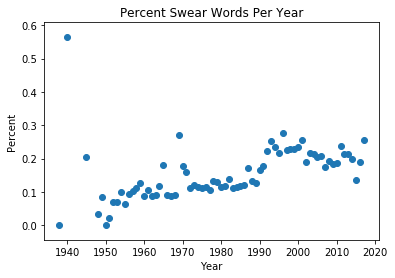

In [11]:
#Percent Swear Words Per Year
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Percent Swear Words Per Year')
plt.scatter(df['Year'],df['%Slang'])

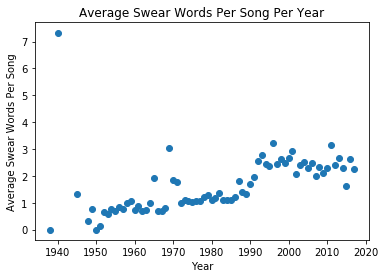

In [12]:
#Average Swear Words Per Song Per Year
plt.xlabel('Year')
plt.ylabel('Average Swear Words Per Song')
plt.title('Average Swear Words Per Song Per Year')
plt.scatter(df['Year'],df['Avg Slang/Song'])

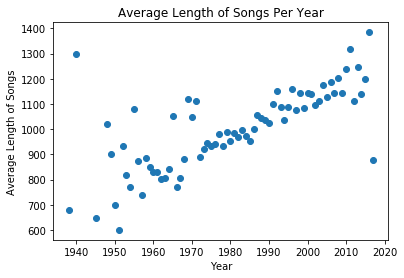

In [13]:
#Average Length of Songs Per Year
plt.xlabel('Year')
plt.ylabel('Average Length of Songs')
plt.title('Average Length of Songs Per Year')
plt.scatter(df['Year'],df['Avg Length'])